In [33]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("kayseri_houses_data.csv")
df["House Price"] = df["House Price"].str.replace(r'TL.*', '', regex=True)
df["House Price"] = df["House Price"].str.replace('.', '').astype(int)
df.to_csv("kayseri_houses_data.csv", index=False)
df

C:\Users\YSK\AppData\Local\Temp/ipykernel_4532/3607225361.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["House Price"] = df["House Price"].str.replace('.', '').astype(int)


,Unnamed: 0,İlan Numarası,İlan Güncelleme Tarihi,Kategorisi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,İlan Oluşturma Tarihi,Türü,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,House Price,House Location,Krediye Uygunluk,Yatırıma Uygunluk,Yapı Durumu
0,0,13646817,29 Temmuz 2023,Satılık,180 M2,0 (Yeni),7,Boş,29 Temmuz 2023,Konut,150 M2,3.5+1,2.Kat,Kombi Doğalgaz,3200000,Kayseri - Melikgazi - Germir Mahallesi,NaN,NaN,NaN
1,1,13646763,29 Temmuz 2023,Satılık,165 M2,0 (Yeni),2,Boş,29 Temmuz 2023,Konut,125 M2,3+1,Düz Giriş,Kombi Doğalgaz,4500000,Kayseri - Kocasinan - Ertuğrul Gazi Mahallesi,NaN,NaN,NaN
2,2,13646753,29 Temmuz 2023,Satılık,110 M2,5-10,9,Boş,29 Temmuz 2023,Konut,100 M2,2+1,Düz Giriş,Merkezi (Pay Ölçer),920000,Kayseri - Melikgazi - Battalgazi Mahallesi,NaN,NaN,NaN
3,3,13646618,30 Temmuz 2023,Satılık,210 M2,5-10,11,Mülk Sahibi Oturuyor,29 Temmuz 2023,Konut,155 M2,3+2,11.Kat,Merkezi (Pay Ölçer),2600000,Kayseri - Melikgazi - İldem Cumhuriyet Mahallesi,NaN,NaN,NaN
4,4,13646589,29 Temmuz 2023,Satılık,155 M2,2,13,Boş,29 Temmuz 2023,Konut,135 M2,3+1,12.Kat,Merkezi Doğalgaz,2300000,Kayseri - Melikgazi - Yıldırım Beyazıt Mahallesi,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,428,10559017,29 Temmuz 2023,Satılık,170 M2,1,14,Boş,25 Ocak 2022,Konut,132 M2,3.5+1,6.Kat,Merkezi (Pay Ölçer),2450000,Kayseri - Talas - Mevlana Mahallesi,NaN,NaN,NaN
1516,429,9990989,22 Mayıs 2023,Satılık,150 M2,21 Ve Üzeri,1,Mülk Sahibi Oturuyor,16 Eylül 2021,Konut,120 M2,3+1,Düz Giriş,Sobalı,410000,Kayseri - Develi - Reşadiye Mahallesi,NaN,NaN,NaN
1517,430,9580093,15 Haziran 2023,Satılık,545 M2,4,2,Boş,27 Mayıs 2021,Konut,540 M2,4+1,Villa Tipi,Kombi Doğalgaz,7590000,Kayseri - Hacılar - Akyazı Mahallesi,NaN,NaN,NaN
1518,431,9046758,17 Temmuz 2023,Satılık,140 M2,5-10,15,Boş,21 Aralık 2020,Konut,120 M2,3+1,9.Kat,Merkezi Doğalgaz,1350000,Kayseri - Talas - Mevlana Mahallesi,NaN,NaN,NaN


In [5]:
df[["Şehir", "İlçe", "Mahalle"]] = df["House Location"].str.split(" - ", expand=True)
# df = df.drop("House Location", axis=1)
df.to_csv("kayseri_houses_data.csv", index=False)
df

,Unnamed: 0,İlan Numarası,İlan Güncelleme Tarihi,Kategorisi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,İlan Oluşturma Tarihi,Türü,...,Bulunduğu Kat,Isıtma Tipi,House Price,House Location,Krediye Uygunluk,Yatırıma Uygunluk,Yapı Durumu,Şehir,İlçe,Mahalle
0,0,13646817,29 Temmuz 2023,Satılık,180 M2,0 (Yeni),7,Boş,29 Temmuz 2023,Konut,...,2.Kat,Kombi Doğalgaz,3200000,Kayseri - Melikgazi - Germir Mahallesi,NaN,NaN,NaN,Kayseri,Melikgazi,Germir Mahallesi
1,1,13646763,29 Temmuz 2023,Satılık,165 M2,0 (Yeni),2,Boş,29 Temmuz 2023,Konut,...,Düz Giriş,Kombi Doğalgaz,4500000,Kayseri - Kocasinan - Ertuğrul Gazi Mahallesi,NaN,NaN,NaN,Kayseri,Kocasinan,Ertuğrul Gazi Mahallesi
2,2,13646753,29 Temmuz 2023,Satılık,110 M2,5-10,9,Boş,29 Temmuz 2023,Konut,...,Düz Giriş,Merkezi (Pay Ölçer),920000,Kayseri - Melikgazi - Battalgazi Mahallesi,NaN,NaN,NaN,Kayseri,Melikgazi,Battalgazi Mahallesi
3,3,13646618,30 Temmuz 2023,Satılık,210 M2,5-10,11,Mülk Sahibi Oturuyor,29 Temmuz 2023,Konut,...,11.Kat,Merkezi (Pay Ölçer),2600000,Kayseri - Melikgazi - İldem Cumhuriyet Mahallesi,NaN,NaN,NaN,Kayseri,Melikgazi,İldem Cumhuriyet Mahallesi
4,4,13646589,29 Temmuz 2023,Satılık,155 M2,2,13,Boş,29 Temmuz 2023,Konut,...,12.Kat,Merkezi Doğalgaz,2300000,Kayseri - Melikgazi - Yıldırım Beyazıt Mahallesi,NaN,NaN,NaN,Kayseri,Melikgazi,Yıldırım Beyazıt Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,428,10559017,29 Temmuz 2023,Satılık,170 M2,1,14,Boş,25 Ocak 2022,Konut,...,6.Kat,Merkezi (Pay Ölçer),2450000,Kayseri - Talas - Mevlana Mahallesi,NaN,NaN,NaN,Kayseri,Talas,Mevlana Mahallesi
1516,429,9990989,22 Mayıs 2023,Satılık,150 M2,21 Ve Üzeri,1,Mülk Sahibi Oturuyor,16 Eylül 2021,Konut,...,Düz Giriş,Sobalı,410000,Kayseri - Develi - Reşadiye Mahallesi,NaN,NaN,NaN,Kayseri,Develi,Reşadiye Mahallesi
1517,430,9580093,15 Haziran 2023,Satılık,545 M2,4,2,Boş,27 Mayıs 2021,Konut,...,Villa Tipi,Kombi Doğalgaz,7590000,Kayseri - Hacılar - Akyazı Mahallesi,NaN,NaN,NaN,Kayseri,Hacılar,Akyazı Mahallesi
1518,431,9046758,17 Temmuz 2023,Satılık,140 M2,5-10,15,Boş,21 Aralık 2020,Konut,...,9.Kat,Merkezi Doğalgaz,1350000,Kayseri - Talas - Mevlana Mahallesi,NaN,NaN,NaN,Kayseri,Talas,Mevlana Mahallesi


In [7]:
columns_to_drop = ["Yatırıma Uygunluk","Krediye Uygunluk", "Yapı Durumu", "Unnamed: 0", "İlan Numarası", "İlan Güncelleme Tarihi", "Kategorisi", "İlan Oluşturma Tarihi"]
processed_data = df.drop(columns=columns_to_drop)
processed_data.to_csv('processed_kayseri_houses_data.csv', index=False)
processed_data

,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Türü,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,House Price,House Location,Şehir,İlçe,Mahalle
0,180 M2,0 (Yeni),7,Boş,Konut,150 M2,3.5+1,2.Kat,Kombi Doğalgaz,3200000,Kayseri - Melikgazi - Germir Mahallesi,Kayseri,Melikgazi,Germir Mahallesi
1,165 M2,0 (Yeni),2,Boş,Konut,125 M2,3+1,Düz Giriş,Kombi Doğalgaz,4500000,Kayseri - Kocasinan - Ertuğrul Gazi Mahallesi,Kayseri,Kocasinan,Ertuğrul Gazi Mahallesi
2,110 M2,5-10,9,Boş,Konut,100 M2,2+1,Düz Giriş,Merkezi (Pay Ölçer),920000,Kayseri - Melikgazi - Battalgazi Mahallesi,Kayseri,Melikgazi,Battalgazi Mahallesi
3,210 M2,5-10,11,Mülk Sahibi Oturuyor,Konut,155 M2,3+2,11.Kat,Merkezi (Pay Ölçer),2600000,Kayseri - Melikgazi - İldem Cumhuriyet Mahallesi,Kayseri,Melikgazi,İldem Cumhuriyet Mahallesi
4,155 M2,2,13,Boş,Konut,135 M2,3+1,12.Kat,Merkezi Doğalgaz,2300000,Kayseri - Melikgazi - Yıldırım Beyazıt Mahallesi,Kayseri,Melikgazi,Yıldırım Beyazıt Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,170 M2,1,14,Boş,Konut,132 M2,3.5+1,6.Kat,Merkezi (Pay Ölçer),2450000,Kayseri - Talas - Mevlana Mahallesi,Kayseri,Talas,Mevlana Mahallesi
1516,150 M2,21 Ve Üzeri,1,Mülk Sahibi Oturuyor,Konut,120 M2,3+1,Düz Giriş,Sobalı,410000,Kayseri - Develi - Reşadiye Mahallesi,Kayseri,Develi,Reşadiye Mahallesi
1517,545 M2,4,2,Boş,Konut,540 M2,4+1,Villa Tipi,Kombi Doğalgaz,7590000,Kayseri - Hacılar - Akyazı Mahallesi,Kayseri,Hacılar,Akyazı Mahallesi
1518,140 M2,5-10,15,Boş,Konut,120 M2,3+1,9.Kat,Merkezi Doğalgaz,1350000,Kayseri - Talas - Mevlana Mahallesi,Kayseri,Talas,Mevlana Mahallesi


In [32]:
processed_data = pd.read_csv('processed_kayseri_houses_data.csv')

processed_data['Net Metrekare'] = processed_data['Net Metrekare'].str.replace("M2", "")
processed_data['Net Metrekare'] = processed_data['Net Metrekare'].str.replace('.', '').astype(int)
processed_data.drop('Brüt Metrekare', axis=1, inplace=True)
processed_data.to_csv('processed_kayseri_houses_data.csv', index=False)
processed_data

C:\Users\YSK\AppData\Local\Temp/ipykernel_4532/1196511944.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  processed_data['Net Metrekare'] = processed_data['Net Metrekare'].str.replace('.', '').astype(int)


,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Türü,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,House Price,House Location,Şehir,İlçe,Mahalle
0,0 (Yeni),7,Boş,Konut,150,3.5+1,2.Kat,Kombi Doğalgaz,3200000,Kayseri - Melikgazi - Germir Mahallesi,Kayseri,Melikgazi,Germir Mahallesi
1,0 (Yeni),2,Boş,Konut,125,3+1,Düz Giriş,Kombi Doğalgaz,4500000,Kayseri - Kocasinan - Ertuğrul Gazi Mahallesi,Kayseri,Kocasinan,Ertuğrul Gazi Mahallesi
2,5-10,9,Boş,Konut,100,2+1,Düz Giriş,Merkezi (Pay Ölçer),920000,Kayseri - Melikgazi - Battalgazi Mahallesi,Kayseri,Melikgazi,Battalgazi Mahallesi
3,5-10,11,Mülk Sahibi Oturuyor,Konut,155,3+2,11.Kat,Merkezi (Pay Ölçer),2600000,Kayseri - Melikgazi - İldem Cumhuriyet Mahallesi,Kayseri,Melikgazi,İldem Cumhuriyet Mahallesi
4,2,13,Boş,Konut,135,3+1,12.Kat,Merkezi Doğalgaz,2300000,Kayseri - Melikgazi - Yıldırım Beyazıt Mahallesi,Kayseri,Melikgazi,Yıldırım Beyazıt Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1,14,Boş,Konut,132,3.5+1,6.Kat,Merkezi (Pay Ölçer),2450000,Kayseri - Talas - Mevlana Mahallesi,Kayseri,Talas,Mevlana Mahallesi
1516,21 Ve Üzeri,1,Mülk Sahibi Oturuyor,Konut,120,3+1,Düz Giriş,Sobalı,410000,Kayseri - Develi - Reşadiye Mahallesi,Kayseri,Develi,Reşadiye Mahallesi
1517,4,2,Boş,Konut,540,4+1,Villa Tipi,Kombi Doğalgaz,7590000,Kayseri - Hacılar - Akyazı Mahallesi,Kayseri,Hacılar,Akyazı Mahallesi
1518,5-10,15,Boş,Konut,120,3+1,9.Kat,Merkezi Doğalgaz,1350000,Kayseri - Talas - Mevlana Mahallesi,Kayseri,Talas,Mevlana Mahallesi


In [36]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Binanın Yaşı        1520 non-null   object
 1   Binanın Kat Sayısı  1520 non-null   int64 
 2   Kullanım Durumu     1520 non-null   object
 3   Türü                1520 non-null   object
 4   Net Metrekare       1520 non-null   int32 
 5   Oda Sayısı          1520 non-null   object
 6   Bulunduğu Kat       1518 non-null   object
 7   Isıtma Tipi         1520 non-null   object
 8   House Price         1520 non-null   int64 
 9   House Location      1520 non-null   object
 10  Şehir               1520 non-null   object
 11  İlçe                1520 non-null   object
 12  Mahalle             1520 non-null   object
dtypes: int32(1), int64(2), object(10)
memory usage: 148.6+ KB


In [37]:
processed_data.İlçe.value_counts()

Melikgazi     681
Kocasinan     406
Talas         323
Develi         77
Hacılar        17
İncesu          8
Sarız           3
Bünyan          2
Sarıoğlan       1
Yeşilhisar      1
Tomarza         1
Name: İlçe, dtype: int64

In [39]:
processed_data.Mahalle.value_counts()

Mevlana Mahallesi             192
Bahçelievler Mahallesi         86
Gesi Fatih Mahallesi           63
Yeşilyurt Mahallesi            54
İldem Cumhuriyet Mahallesi     51
                             ... 
Hunat Mahallesi                 1
Cumhuriyet Mahallesi            1
Boyacı Mahallesi                1
Güneşli Mahallesi               1
Hacı Saki Mahallesi             1
Name: Mahalle, Length: 139, dtype: int64

<AxesSubplot:>

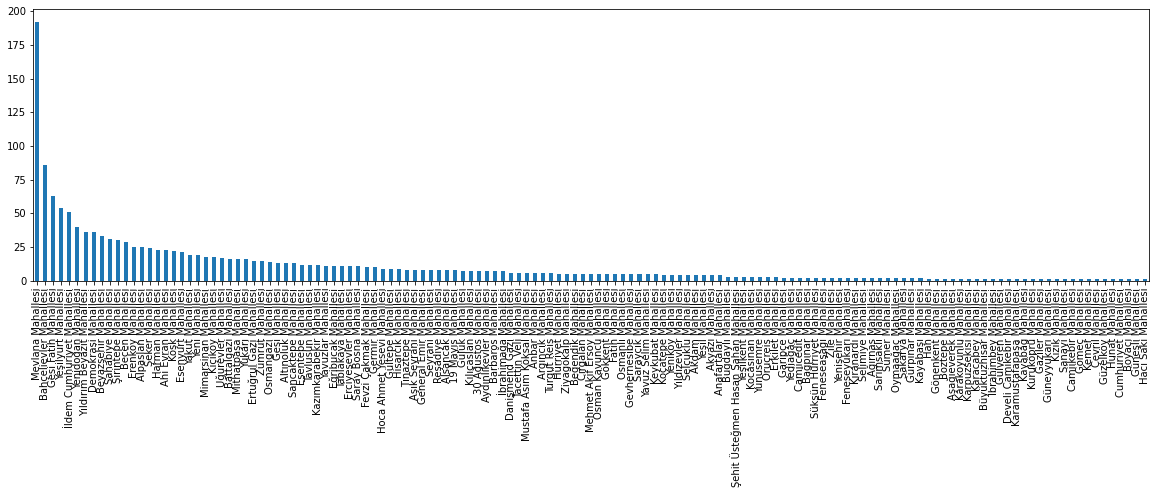

In [42]:
processed_data.Mahalle.value_counts().plot(kind='bar', figsize=(20, 5))

In [43]:
processed_data["Bulunduğu Kat"].value_counts()

1.Kat             169
Düz Giriş         162
2.Kat             144
4.Kat             144
3.Kat             132
5.Kat             111
6.Kat              89
7.Kat              86
8.Kat              67
9.Kat              62
11.Kat             54
10.Kat             49
Villa Tipi         43
12.Kat             42
13.Kat             33
Yüksek Giriş       28
Bahçe Dublex       22
14.Kat             20
Müstakil.Kat       20
Bahçe Katı         15
Çatı Katı          10
Tam Bodrum.Kat      3
10-20.Kat           3
Kot 2 (-2).Kat      2
17.Kat              2
15.Kat              1
Kot 1 (-1).Kat      1
Yüksek Bodrum       1
16.Kat              1
Çatı Dubleks        1
Yarı Bodrum         1
Name: Bulunduğu Kat, dtype: int64

In [44]:
processed_data["Binanın Yaşı"].value_counts()

0 (Yeni)       515
5-10           340
11-15          181
21 Ve Üzeri    148
16-20           95
4               83
1               57
2               54
3               47
Name: Binanın Yaşı, dtype: int64

Text(0, 0.5, 'Binanın Yaşı')

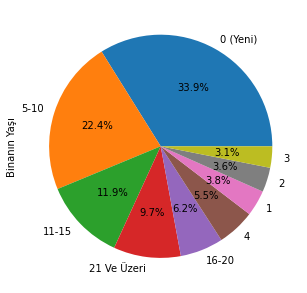

In [49]:
fig = plt.figure(figsize=(5, 15))
processed_data["Binanın Yaşı"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("Binanın Yaşı")

In [46]:
processed_data["Net Metrekare"].describe()

count    1520.000000
mean      164.803947
std       215.862295
min        25.000000
25%       115.000000
50%       135.000000
75%       160.000000
max      4000.000000
Name: Net Metrekare, dtype: float64

In [47]:
processed_data["Oda Sayısı"].value_counts()

3+1       832
4+1       210
2+1       206
5+1        41
3.5+1      35
2.5+1      35
1+1        30
6+1        22
9+ Oda     20
4.5+1      11
6+2        10
1 Oda      10
7+1         9
3+0         9
4+2         7
8+1         6
3+2         6
5+2         6
Stüdyo      3
7+2         2
2+0         1
4+3         1
8+2         1
5+4         1
1.5+1       1
6+4         1
5+3         1
5+0         1
4+0         1
7+3         1
Name: Oda Sayısı, dtype: int64

In [50]:
processed_data["Isıtma Tipi"].value_counts()

Merkezi (Pay Ölçer)    571
Kombi Doğalgaz         438
Merkezi Doğalgaz       378
Sobalı                  72
Isıtma Yok              22
Yerden Isıtma           17
Kat Kaloriferi          12
Merkezi Fueloil          4
Doğalgaz Sobalı          3
Güneş Enerjisi           1
Şömine                   1
Klimalı                  1
Name: Isıtma Tipi, dtype: int64

In [51]:
processed_data["Kullanım Durumu"].value_counts()

Boş                     875
Mülk Sahibi Oturuyor    331
Kiracı Oturuyor         314
Name: Kullanım Durumu, dtype: int64